# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [18]:
#Importemos los paquetes necesarios
import sympy as sym

from sympy.interactive import printing #imprimes como latex 

printing.init_printing(use_latex=True)

from sympy import *

In [26]:
#a)
#hagamoslas variables simbólicas
g,w,x,y,z=sym.symbols('g,w,x,y,z')

In [41]:
y=Function('y')#para que se pueda comportar como funcion
y=cos(x)
y

In [40]:
z=Function('z')
z=sin(x)
z

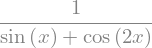

In [58]:
w=1/(z+cos(2*x))
w

In [23]:
g=Function('g')

In [43]:
#b)
g=y*z
g

In [45]:
#y su derivada:
diff(g,x)

In [46]:
#c)
#no importamos matplotlib pues Sympy tiene la capacidad de graficar

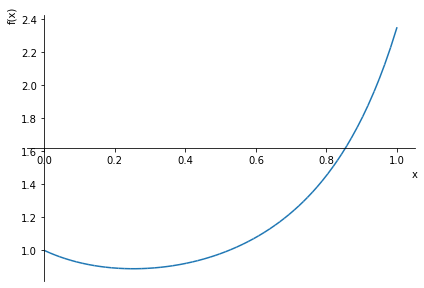

In [53]:
w1=plot(w, (x,0,1))

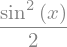

In [76]:
#d) integrando sin cotas, INTEGRAMOS g EN VEZ DE w
integrate(g, x)

In [61]:
#no olvidar + C ;)

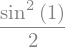

In [80]:
#ahora evaluado de 0 a 1
integrate(g, (x,0, 1))

In [70]:
#e) límites cuando x tiende a 0

#de y
limit(y, x, 0)

In [71]:
# de z
limit(z, x, 0)

In [72]:
#de g
limit(g, x, 0)

In [74]:
#de w
limit(w, x, 0)

In [75]:
#f) expandir y, z por Taylor hasta orden 3

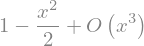

In [95]:
#para Y
#en Sympy 'series' trabaja directamente con Taylor
Ty= series(y, n=3)
# está trabajando como si estuviera centrado en cero, 

Ty

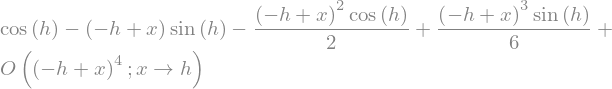

In [108]:
#si buscamos la expresión completa seria:
h=Symbol('h')
y.series(x,h,4) #orden 4 para ver porqué se elimina el término al cubo en cero

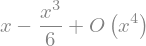

In [107]:
#para Z
Tz=series(z, n=4) #ponemos de orden 4 para que indique el término al cubo
#igualmente trabaja centrado en 0
Tz

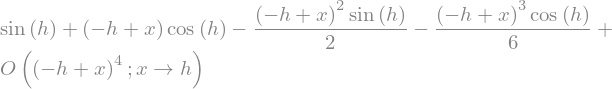

In [105]:
#de igual forma si queremos la expansión completa:
z.series(x,h,4)

<div class="alert alert-info">
    
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
N = 1000 # número de pasos

x0 = 0.0  # posición inicial

y0 = 0.0  # velocidad inicial

z0 = 0.0 # aceleración de la gravedad en la tierra

tau = 100.0 # tiempo de la simulación
 
dt = tau/(float)(N-1)  # tamaño del paso

In [15]:
time = np.linspace(0, tau, N)

In [16]:
y = np.zeros([N,3])

y[0,0] = x0
y[0,1] = y0
y[0,2] = z0

In [20]:
#copiemos la funcion usada en clase
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [29]:
#es un sistema de primer orden por lo que no hay que modificar con nuevas variables
#definamos:
def Rossler(estado, sistema):
    d_x=-estado[1]-estado[2]
    d_y=estado[0]+0.13*estado[1]
    d_z=b= 0.2+estado[2]*(estado[0]-6.5)
    return np.array([d_x,d_y,d_z])


In [30]:
for j in range(N-1):
    y[j+1] = RK2(y[j], time[j], dt, Rossler)

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

In [31]:
x=y[:,0]
yp=y[:,1]
z=y[:,2]

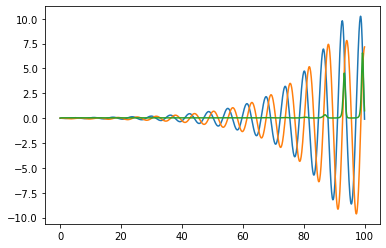

In [32]:
plt.plot(time, x, label="theta")
plt.plot(time, yp, label="theta")
plt.plot(time, z, label="theta")

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

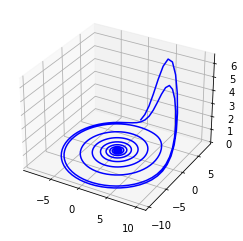

In [35]:
ax=plt.axes(projection='3d')
ax.plot3D(x,yp,z,'blue')